In [437]:
import pandas as pd
import numpy as np

In [43]:
# df = pd.read_csv('laptops_10.csv', sep=',')
# df.sample()

In [45]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv', sep=',')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2796,1454100267,20150417T000000,430000.0,2,1.00,1460,9207,1.0,0,0,3,7,1210,250,1947,0,98125,47.7195,-122.287,1500,6898
3321,2724200705,20141212T000000,95000.0,2,1.00,800,8550,1.0,0,0,3,7,800,0,1947,0,98198,47.4075,-122.294,1490,8550
19274,821069025,20150213T000000,685000.0,3,2.50,3290,90796,2.0,0,0,4,10,3290,0,1992,0,98042,47.3154,-122.079,2700,55023
10924,1310900140,20140624T000000,305000.0,4,2.25,2210,9371,2.0,0,0,4,8,2210,0,1968,0,98032,47.3634,-122.279,2300,11584
21554,2855000110,20140808T000000,388000.0,3,2.50,2198,6222,2.0,0,2,3,8,2198,0,2010,0,98198,47.3906,-122.304,2198,7621


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#### Расшифровка данных в таблице:
- id - Уникальный ID для каждого дома
- date - Дата продажи дома
- price - Стоимость продажи дома
- bedrooms - Кол-во спален
- bathrooms - Кол-во ванных комнат (0.5 - туалет без душа)
- sqft_living - Кв. метры жилые
- sqft_lot - Кв. метры общие
- floors - Кол-во этажей
- waterfront - Есть набержная или нет
- view - Значение от 0 до 4 насколько хороший вид
- condition - Значение от 1 до 5 насколько хорошее состояние
- grade - Значение от 1 до 13, где 1-3 плохая конструкция здания и дизайн, 7 - средний уровень конструкции и дизайна, 11-13 - высокое  качество конструкции и дизайна
- sqft_above - Кв. метры дома, которые находятся выше земли
- sqft_basement - Кв. метры дома, которые находятся ниже земли
- yr_built - Год постройки дома
- yr_renovated - Год ремонта дома
- zipcode - Индес
- lat - Широтма
- long - Долгота
- sqft_living15 - Кв. метры жилой площади у 15 соседей
- sqft_lot15 - Кв. метры общей площади у 15 соседей

### Задача 1
- Постройте график
- Назовите график
- Сделайте наименование оси x и оси y
- Сделайте выводы

#### 1.1 Скачать следующие данные: kc-house-data и laptop_price
#### 1.2 Изучите стоимости недвижимости

In [70]:
df['price'].min(), df['price'].max()

(75000.0, 7700000.0)

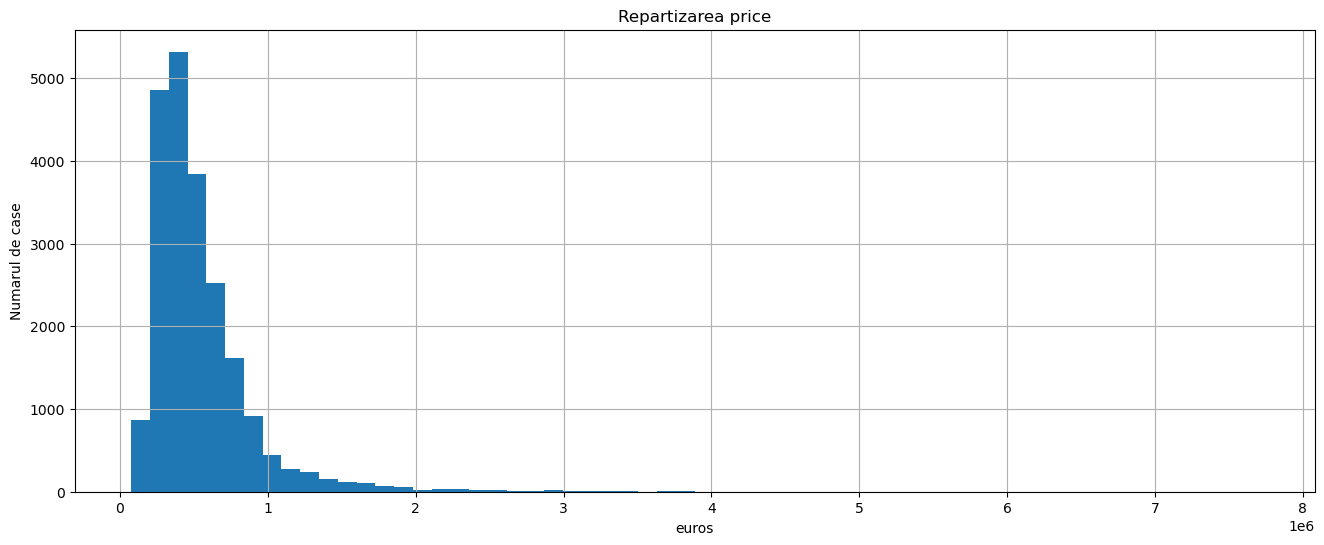

In [266]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
plt.hist(df['price'], bins=60)
plt.title('Repartizarea price')
plt.ylabel('Numarul de case')
plt.xlabel('euros')
plt.grid();

#### 1.3 Изучите распределение квадратуры жилой

In [147]:
df['sqft_living'].min(), df['sqft_living'].max()

(290, 13540)

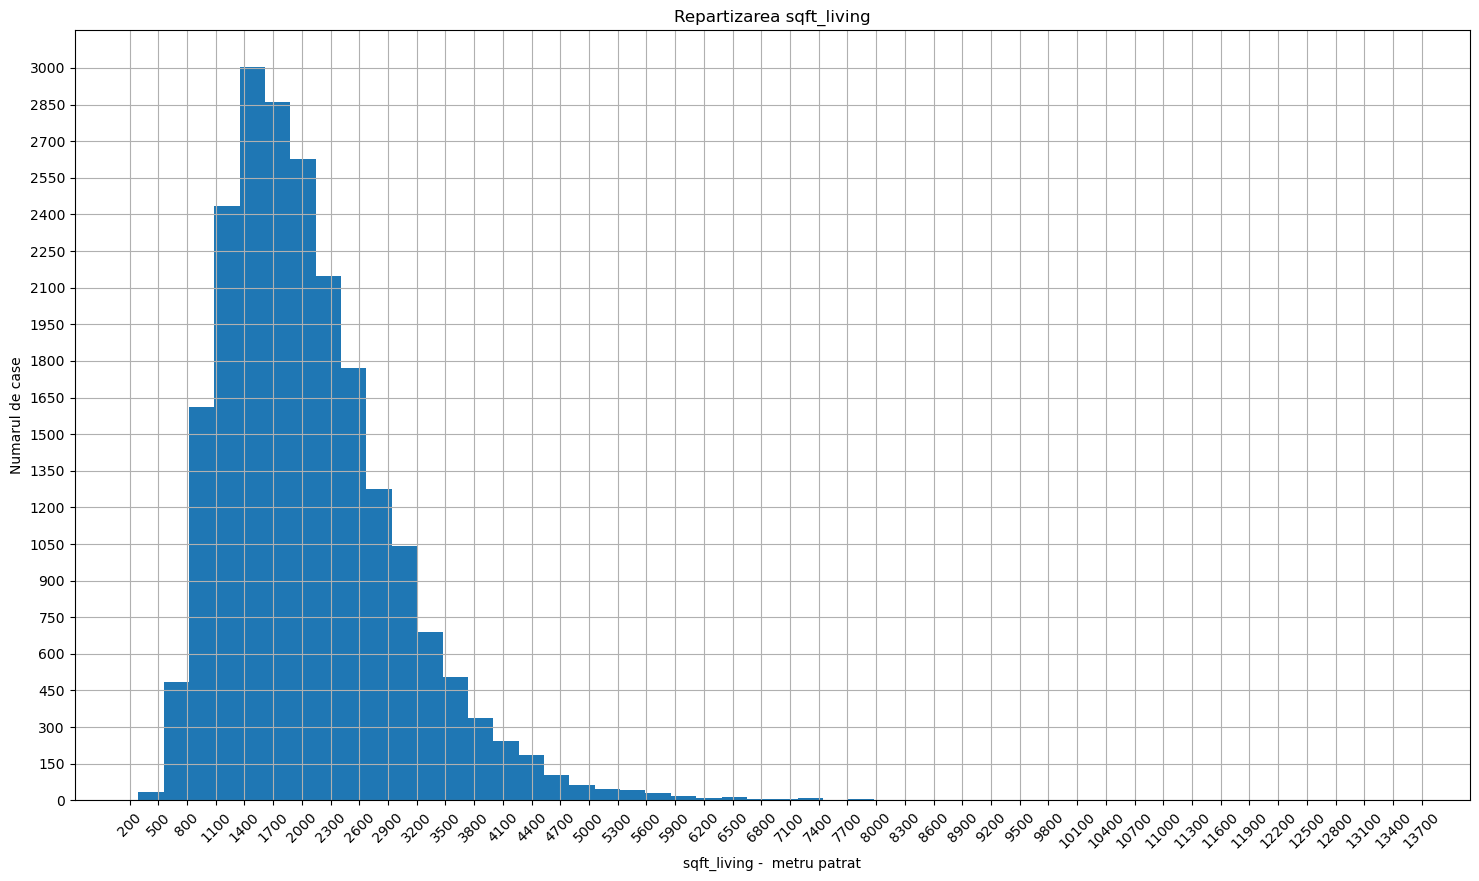

In [199]:
plt.figure(figsize=(18,8))
plt.hist(df['sqft_living'], bins=50)
plt.title('Repartizarea sqft_living')
plt.ylabel('Numarul de case')
plt.xlabel('sqft_living -  metru patrat')
plt.xticks(range(200, 13700, 300), rotation=45)# указываем диапазон и шаг
plt.yticks(range(0, 3200, 50))
plt.grid();

#### 1.4 Изучите распределение года постройки

In [207]:
df['yr_built'].min(), df['yr_built'].max()

(1900, 2015)

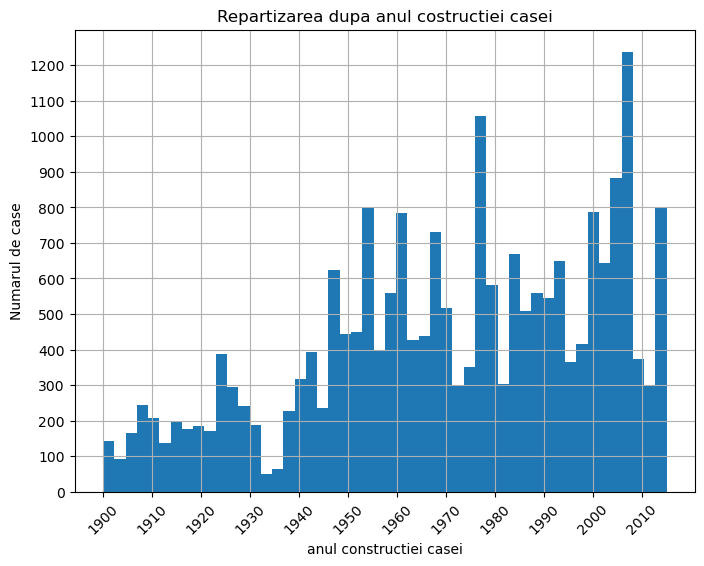

In [273]:
plt.figure(figsize=(8,6))
plt.hist(df['yr_built'], bins=50)
plt.title('Repartizarea dupa anul costructiei casei')
plt.ylabel('Numarul de case')
plt.xlabel('anul constructiei casei')
plt.xticks(range(1900, 2020, 10), rotation=45)# указываем диапазон и шаг
plt.yticks(range(0, 1300, 100))
plt.grid();

#### Был проведен анализ распределения домов согластно их стоимости, согластно квадратуре жилой площади и по году постройки, можем сделать следующие выводы:
- Распределение домов согластно их стоимости: стоимость большинства домов находиться в диапазоне до $1,000,000, с наибольшей концентрацией в наиболее низком ценовом сегменте.
- Распределение домов по квадратуре жилой площади: большинство домов имеют жилую площадь от 800 до 3,000 квадратных метров.
- Распределение домов согластно году постройки: наибольшее количество домов было построено в период с 1950-х до 2010-х годов.

### 2 задача
- Постройте график
- Сделайте выводы

#### 2.1. Изучите распределение домов от наличия вида на набережную

In [277]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('kc_house_data.csv', sep=',')
df.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21074,263000006,20141216T000000,375000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1445
15056,5205000020,20150409T000000,360000.0,4,2.50,2610,7333,2.0,0,0,3,8,2610,0,1988,0,98003,47.2721,-122.293,2280,9033
3825,2916600110,20150430T000000,214946.0,3,1.75,1290,8688,1.0,0,0,4,7,1290,0,1980,0,98042,47.3655,-122.080,1750,9090
6622,3172600095,20140708T000000,371500.0,3,1.00,1650,6400,1.0,0,0,4,7,980,670,1954,0,98106,47.5200,-122.365,1230,6400
10419,9540100060,20140926T000000,330000.0,3,1.75,1590,9417,1.0,0,0,4,7,1590,0,1954,0,98177,47.7617,-122.360,1600,9272


In [293]:
data_waterfront = df['waterfront'].value_counts()
data_waterfront.index = ['no', 'yes']
data_waterfront

no     21450
yes      163
Name: count, dtype: int64

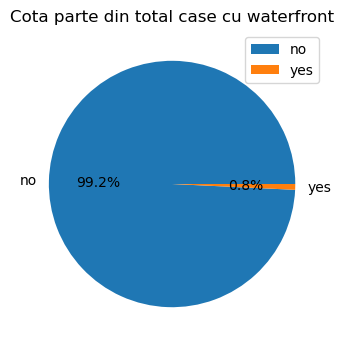

In [309]:
plt.figure(figsize=(6, 4))
plt.pie(data_waterfront, labels=data_waterfront.index, autopct='%1.1f%%')
plt.title('Cota parte din total case cu waterfront')
plt.legend(data_waterfront.index);

#### 2.2. Изучите распределение этажей домов

In [410]:
data_floors = df['floors'].value_counts()
names = data_floors.index
values = data_floors.values
data_floors

floors
1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: count, dtype: int64

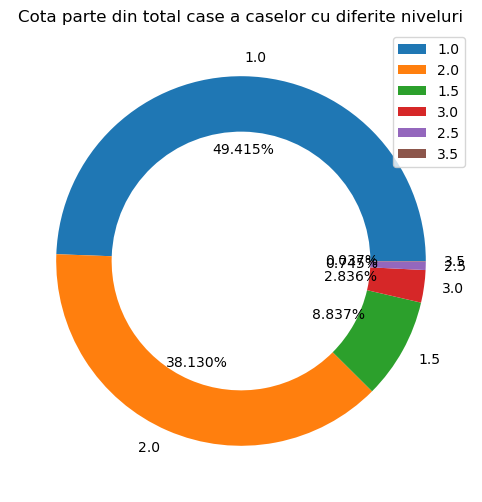

In [416]:
plt.figure(figsize=(8, 6))
plt.pie(values, labels=names, autopct='%1.3f%%', wedgeprops=dict(width=0.3))
plt.title('Cota parte din total case a caselor cu diferite niveluri')
plt.legend(names);

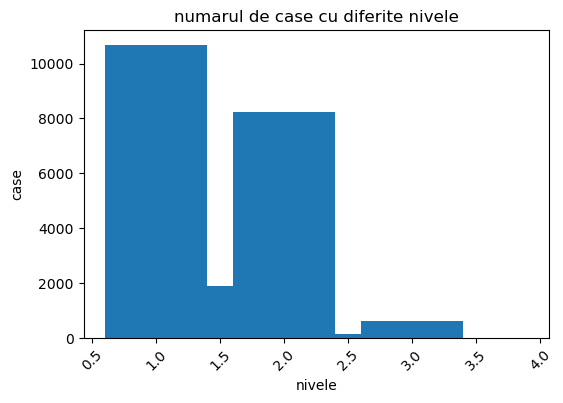

In [418]:
plt.figure(figsize=(6, 4))
plt.bar(names, values)
plt.title('numarul de case cu diferite nivele')
plt.xlabel('nivele')
plt.ylabel('case') 
plt.xticks(rotation=45);

#### 2.3. Изучите распределение состояния домов

In [420]:
data_cond = df['condition'].value_counts()

names_cond = data_cond.index
values_cond = data_cond.values
data_cond

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

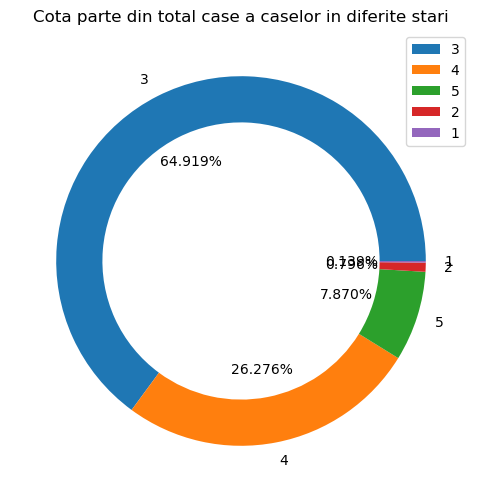

In [422]:
plt.figure(figsize=(8, 6))
plt.pie(values_cond, labels=names_cond, autopct='%1.3f%%', wedgeprops=dict(width=0.25))
plt.title('Cota parte din total case a caselor in diferite stari')
plt.legend(names_cond);

#### Был проведен анализ распределения домов относительно наличия или отсутствия вида на набережную, количеству этажей и состоянию дома, можем сделать следующие выводы:
- Большинство домов не имеют вида на набережную, можем предположить, что вид на набережную это одна из характеристик, которая определяет стоимость дома, дом с видом на набережную является более эксклюзивным и дорогим из-за привлекательного местоположения.
- Одно, двух и полуторноэтажные дома являются наиболее распространенными в этом регионе, возможно, это связано с тем, что строительные нормы данного региона определяются местными климатическими и/или историческими условиями, а так же строительство одно, двух и полуторноэтажных  домов  может отражать покупательские преференции
- Состояние большинства домов является или нормальным(3) или хорошимим(4), дома в очень плохом(1) или отличном(5) состоянии встречаются реже, возможно, это указывает на то, что владельцы заботятся о своей недвижимости и поддерживают её в хорошем состоянии,  так же с тем что дома в плохом состоянии менее привлекательны для покупателей, а дома в отличном состоянии могут быть менее доступны из-за высокой стоимости.

### 3 задача

- Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
- Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [429]:
df.sample()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
6886,4040600190,20140806T000000,509500.0,5,2.25,2060,9000,1.0,0,0,4,7,1320,740,1961,0,98007,47.6122,-122.137,2050,8800


In [431]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [491]:
corr_df = df[['price', 'bedrooms', 'bathrooms', 'waterfront', 'sqft_living', 'view', 'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15']].corr().round(2)
corr_df

,price,bedrooms,bathrooms,waterfront,sqft_living,view,grade,sqft_above,sqft_basement,lat,sqft_living15
price,1.00,0.31,0.53,0.27,0.70,0.40,0.67,0.61,0.32,0.31,0.59
bedrooms,0.31,1.00,0.52,-0.01,0.58,0.08,0.36,0.48,0.30,-0.01,0.39
bathrooms,0.53,0.52,1.00,0.06,0.75,0.19,0.66,0.69,0.28,0.02,0.57
waterfront,0.27,-0.01,0.06,1.00,0.10,0.40,0.08,0.07,0.08,-0.01,0.09
sqft_living,0.70,0.58,0.75,0.10,1.00,0.28,0.76,0.88,0.44,0.05,0.76
view,0.40,0.08,0.19,0.40,0.28,1.00,0.25,0.17,0.28,0.01,0.28
grade,0.67,0.36,0.66,0.08,0.76,0.25,1.00,0.76,0.17,0.11,0.71
sqft_above,0.61,0.48,0.69,0.07,0.88,0.17,0.76,1.00,-0.05,-0.00,0.73
sqft_basement,0.32,0.30,0.28,0.08,0.44,0.28,0.17,-0.05,1.00,0.11,0.20
lat,0.31,-0.01,0.02,-0.01,0.05,0.01,0.11,-0.00,0.11,1.00,0.05


In [495]:
corr_df_inalt = df[['price', 'bathrooms',  'sqft_living', 'grade', 'sqft_above',  'sqft_living15']].corr().round(2)
corr_df_inalt

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
price,1.00,0.53,0.70,0.67,0.61,0.59
bathrooms,0.53,1.00,0.75,0.66,0.69,0.57
sqft_living,0.70,0.75,1.00,0.76,0.88,0.76
grade,0.67,0.66,0.76,1.00,0.76,0.71
sqft_above,0.61,0.69,0.88,0.76,1.00,0.73
sqft_living15,0.59,0.57,0.76,0.71,0.73,1.00


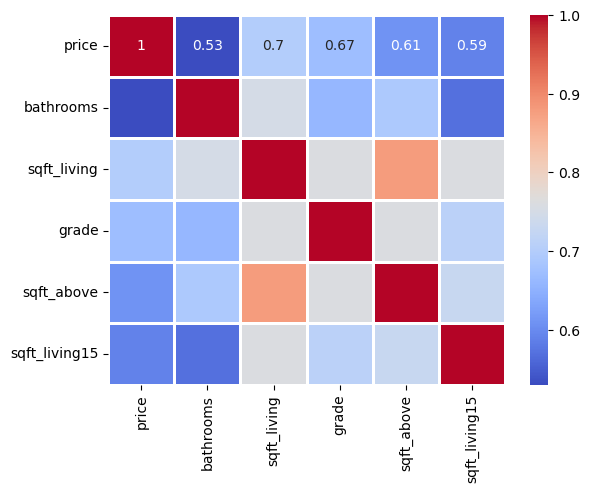

In [499]:
sns.heatmap(corr_df_inalt, annot=True, cmap='coolwarm', linewidths='1');

In [515]:
corr_df_scazut = df[['price', 'bedrooms', 'floors', 'waterfront',  'view', 'sqft_basement', 'lat']].corr().round(2)
corr_df_scazut

,price,bedrooms,floors,waterfront,view,sqft_basement,lat
price,1.00,0.31,0.26,0.27,0.40,0.32,0.31
bedrooms,0.31,1.00,0.18,-0.01,0.08,0.30,-0.01
floors,0.26,0.18,1.00,0.02,0.03,-0.25,0.05
waterfront,0.27,-0.01,0.02,1.00,0.40,0.08,-0.01
view,0.40,0.08,0.03,0.40,1.00,0.28,0.01
sqft_basement,0.32,0.30,-0.25,0.08,0.28,1.00,0.11
lat,0.31,-0.01,0.05,-0.01,0.01,0.11,1.00


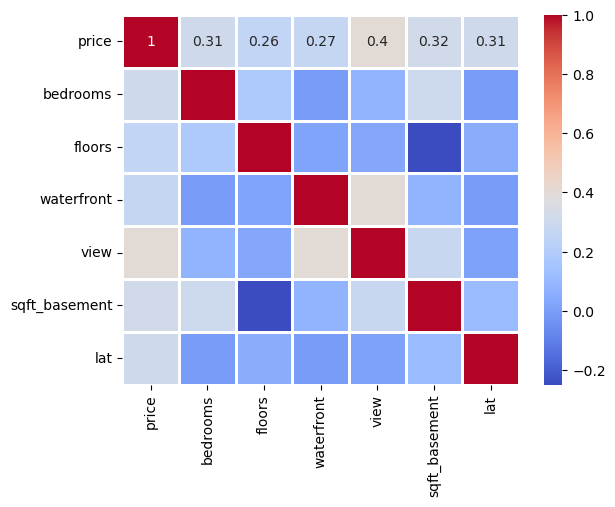

In [517]:
sns.heatmap(corr_df_scazut, annot=True, cmap='coolwarm', linewidths='1');

In [521]:
corr_df_min = df[['price','sqft_lot','condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'sqft_lot15']].corr().round(2)
corr_df_min

,price,sqft_lot,condition,yr_built,yr_renovated,zipcode,long,sqft_lot15
price,1.00,0.09,0.04,0.05,0.13,-0.05,0.02,0.08
sqft_lot,0.09,1.00,-0.01,0.05,0.01,-0.13,0.23,0.72
condition,0.04,-0.01,1.00,-0.36,-0.06,0.00,-0.11,-0.00
yr_built,0.05,0.05,-0.36,1.00,-0.22,-0.35,0.41,0.07
yr_renovated,0.13,0.01,-0.06,-0.22,1.00,0.06,-0.07,0.01
zipcode,-0.05,-0.13,0.00,-0.35,0.06,1.00,-0.56,-0.15
long,0.02,0.23,-0.11,0.41,-0.07,-0.56,1.00,0.25
sqft_lot15,0.08,0.72,-0.00,0.07,0.01,-0.15,0.25,1.00


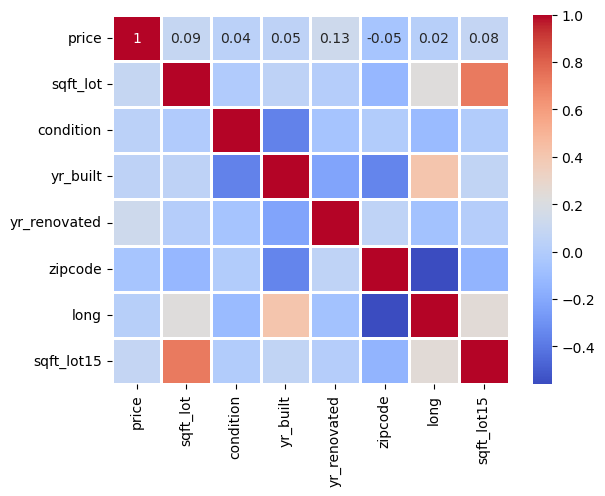

In [525]:
sns.heatmap(corr_df_min, annot=True, cmap='coolwarm', linewidths='1');

### Анализ соотношения цены домов и других показателей.
В качестве инструмента использовался sns.heatmap в следствии следующих причин:
   - наличие большой выборки  и большого количества признаков обьектов,
   - sns.heatmap  позволяет показать соотношение цены и признака (характеристики объекта),
   - позволяет рассмотреть большое количество признаков одновременно(мы умеем делать только 2 столбика в "барах").
     
В следствии расмотрения корреляции цены домов и их признаков пришли к следующим выводам:
- В большей степени на цену влияет метраж жилой площади дома (кор = 0,7), тип конструкции и дизайн (кор = 0,67), площадь дома над землей (кор = 0.61), метраж жилой площади соседских домов (кор = 0,59) и наличие ванных комнат (кор = 0,53).
- Вид из окон дома влияет на стоимость дома в меньшей степени (кор = 0,4)
- Не существенно на цену дома влияют следующие характеристики: расположение дома по широте, количество спален и этожей, наличие или отсутствие вида на набережную, площадь дома под землей, в данных случаях прослеживаем слабую корреляцию от 0,26 до 0,32.
- Относительно характеристик, таких как: расположение дома по долготе, его общая площадь, его состояние, год постройки и год реновации, метраж общей площади соседских домов, можем сказать что корреляция, этих показателей с ценой не прослеживается.
-  Так же можем отметить, что не прослеживается обратной корреляции цены и других характеристик домов в анализируемой выборке.